In [2]:
!pip install --downgrade scikit-learn
!pip install --upgrade imbalanced-learn


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --downgrade
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.7 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Importing the Finance Dataset for Credit Risk and Fraud Detection
Source: Kaggle Dataset - Finance Dataset for Credit Risk Fraud Detection 
https://www.kaggle.com/datasets/s3r1alsh0ck/finance-dataset-for-credit-risk-fraud-detection

In [5]:
df = pd.read_csv('/Users/behnam/Downloads/5k.csv')
print(df.shape)
print(df.columns)
df.head()

(5000, 19)
Index(['Age', 'Occupation', 'Risk Tolerance', 'Investment Goals',
       'Income Level', 'Address', 'Account Balance', 'Deposits', 'Withdrawals',
       'Transfers', 'International Transfers', 'Investments', 'Loan Amount',
       'Loan Purpose', 'Employment Status', 'Loan Term (Months)',
       'Interest Rate', 'Loan Status', 'Transaction Description'],
      dtype='object')


,Age,Occupation,Risk Tolerance,Investment Goals,Income Level,Address,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status,Transaction Description
0,40,Lawyer,High,Wealth Preservation,$46044.94,"7168 Moody Meadow\nHernandezshire, PW 06016",$44653.26,$9156.01,$9327.70,$3647.92,$82.80,$8729.30,$27010.93,Medical Expenses,Retired,36,11.94%,pending,"Electronics transaction of $706.18 at Sanders,..."
1,30,Teacher,Low,Wealth Preservation,$57169.50,"50001 Hector Square\nWest Luisfurt, MA 51935",$29175.47,$5933.22,$8671.60,$6729.86,$819.69,$4545.18,$31266.97,Auto Purchase,Retired,36,8.08%,approved,Transaction at Evans-Smith for $2250.03
2,37,Teacher,Low,Speculation,$71760.86,"997 James Isle\nNorth Rebeccafurt, RI 13366",$86141.59,$22583.11,$16468.58,$6032.53,$1526.33,$8251.45,$41260.58,Auto Purchase,Employed,12,13.07%,pending,Purchase at Taylor-Gutierrez for $615.85 on 20...
3,27,Student,Medium,Speculation,$-25488.15,"1607 Joshua Camp Apt. 634\nConleymouth, CT 66479",$1000.00,$299.47,$289.09,$109.83,$3.51,$195.73,$5000.00,Small Business,Retired,60,6.73%,approved,Travel transaction of $4852.39 at Jones-Russell
4,36,Engineer,Low,Income Generation,$106777.95,"96690 Campbell Common\nDwaynetown, MI 71857",$77918.97,$13853.25,$22699.32,$12189.32,$2152.51,$9725.21,$50000.00,Medical Expenses,Employed,24,10.60%,approved,"Purchase at Jensen, Porter and Webb for $562.2..."


## Data Preprocessing

In [7]:
df.drop(columns=['Investment Goals','Address','Transaction Description'],inplace=True)
df.head()

,Age,Occupation,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status
0,40,Lawyer,High,$46044.94,$44653.26,$9156.01,$9327.70,$3647.92,$82.80,$8729.30,$27010.93,Medical Expenses,Retired,36,11.94%,pending
1,30,Teacher,Low,$57169.50,$29175.47,$5933.22,$8671.60,$6729.86,$819.69,$4545.18,$31266.97,Auto Purchase,Retired,36,8.08%,approved
2,37,Teacher,Low,$71760.86,$86141.59,$22583.11,$16468.58,$6032.53,$1526.33,$8251.45,$41260.58,Auto Purchase,Employed,12,13.07%,pending
3,27,Student,Medium,$-25488.15,$1000.00,$299.47,$289.09,$109.83,$3.51,$195.73,$5000.00,Small Business,Retired,60,6.73%,approved
4,36,Engineer,Low,$106777.95,$77918.97,$13853.25,$22699.32,$12189.32,$2152.51,$9725.21,$50000.00,Medical Expenses,Employed,24,10.60%,approved


In [8]:
df.isna().sum()

Age                        0
Occupation                 0
Risk Tolerance             0
Income Level               0
Account Balance            0
Deposits                   0
Withdrawals                0
Transfers                  0
International Transfers    0
Investments                0
Loan Amount                0
Loan Purpose               0
Employment Status          0
Loan Term (Months)         0
Interest Rate              0
Loan Status                0
dtype: int64

In [9]:
print('High' in df['Risk Tolerance'].values)
df['Risk Tolerance'].unique()

True


array(['High', 'Low', 'Medium'], dtype=object)

## For the purpose of classification, we have assigned binary labels: 0 for low and medium risk levels, and 1 for high-risk levels.

In [11]:
df['Risk Tolerance'] = df['Risk Tolerance'].map({'Low': 0, 'Medium': 0, 'High': 1})

## Risk Class Distribution 

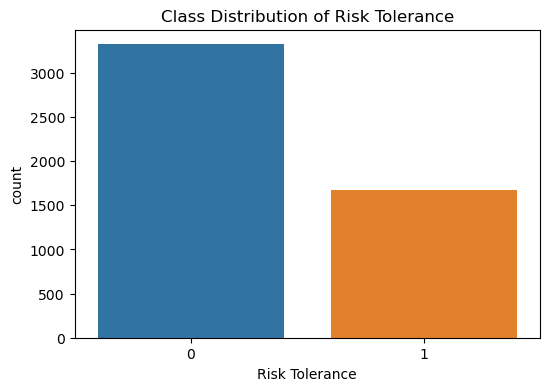

In [13]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Risk Tolerance', data=df)
plt.title('Class Distribution of Risk Tolerance')
plt.show()

## Converting categorical values to numerical

In [15]:
occupation_df = pd.get_dummies(df[['Occupation','Loan Purpose','Loan Status','Employment Status']]).astype('int')
occupation_df.head()

,Occupation_Artist,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Retiree,Occupation_Student,Occupation_Teacher,Loan Purpose_Auto Purchase,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Medical Expenses,Loan Purpose_Small Business,Loan Status_approved,Loan Status_pending,Loan Status_rejected,Employment Status_Employed,Employment Status_Retired,Employment Status_Self-Employed,Employment Status_Unemployed
0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0


In [16]:
df.drop(columns=['Occupation','Loan Purpose','Loan Status','Employment Status'],inplace=True)

In [17]:
df=pd.concat([df,occupation_df],axis=1)
df.head()

,Age,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,...,Loan Purpose_Home Improvement,Loan Purpose_Medical Expenses,Loan Purpose_Small Business,Loan Status_approved,Loan Status_pending,Loan Status_rejected,Employment Status_Employed,Employment Status_Retired,Employment Status_Self-Employed,Employment Status_Unemployed
0,40,1,$46044.94,$44653.26,$9156.01,$9327.70,$3647.92,$82.80,$8729.30,$27010.93,...,0,1,0,0,1,0,0,1,0,0
1,30,0,$57169.50,$29175.47,$5933.22,$8671.60,$6729.86,$819.69,$4545.18,$31266.97,...,0,0,0,1,0,0,0,1,0,0
2,37,0,$71760.86,$86141.59,$22583.11,$16468.58,$6032.53,$1526.33,$8251.45,$41260.58,...,0,0,0,0,1,0,1,0,0,0
3,27,0,$-25488.15,$1000.00,$299.47,$289.09,$109.83,$3.51,$195.73,$5000.00,...,0,0,1,1,0,0,0,1,0,0
4,36,0,$106777.95,$77918.97,$13853.25,$22699.32,$12189.32,$2152.51,$9725.21,$50000.00,...,0,1,0,1,0,0,1,0,0,0


In [18]:
df.shape

(5000, 31)

In [19]:

df['Interest Rate'] = df['Interest Rate'].replace('%', '', regex=True).astype(float) / 100
print(df['Interest Rate'])

0       0.1194
1       0.0808
2       0.1307
3       0.0673
4       0.1060
         ...  
4995    0.1141
4996    0.0938
4997    0.1002
4998    0.0849
4999    0.0795
Name: Interest Rate, Length: 5000, dtype: float64


In [20]:
print(df['Risk Tolerance'])

0       1
1       0
2       0
3       0
4       0
       ..
4995    1
4996    0
4997    0
4998    0
4999    0
Name: Risk Tolerance, Length: 5000, dtype: int64


## Dividing the Dataset

In [22]:
X_unbalanced=df.drop(columns=['Risk Tolerance'])
y_unbalanced=df['Risk Tolerance']
X_unbalanced.head()

,Age,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Term (Months),...,Loan Purpose_Home Improvement,Loan Purpose_Medical Expenses,Loan Purpose_Small Business,Loan Status_approved,Loan Status_pending,Loan Status_rejected,Employment Status_Employed,Employment Status_Retired,Employment Status_Self-Employed,Employment Status_Unemployed
0,40,$46044.94,$44653.26,$9156.01,$9327.70,$3647.92,$82.80,$8729.30,$27010.93,36,...,0,1,0,0,1,0,0,1,0,0
1,30,$57169.50,$29175.47,$5933.22,$8671.60,$6729.86,$819.69,$4545.18,$31266.97,36,...,0,0,0,1,0,0,0,1,0,0
2,37,$71760.86,$86141.59,$22583.11,$16468.58,$6032.53,$1526.33,$8251.45,$41260.58,12,...,0,0,0,0,1,0,1,0,0,0
3,27,$-25488.15,$1000.00,$299.47,$289.09,$109.83,$3.51,$195.73,$5000.00,60,...,0,0,1,1,0,0,0,1,0,0
4,36,$106777.95,$77918.97,$13853.25,$22699.32,$12189.32,$2152.51,$9725.21,$50000.00,24,...,0,1,0,1,0,0,1,0,0,0


## Balancing dataset

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X_unbalanced, y_unbalanced)

In [25]:
print(X['Interest Rate'])

0       0.1194
1       0.0808
2       0.1307
3       0.0673
4       0.1060
         ...  
6643    0.1223
6644    0.1350
6645    0.0875
6646    0.0740
6647    0.1138
Name: Interest Rate, Length: 6648, dtype: float64


## Feature Correlations

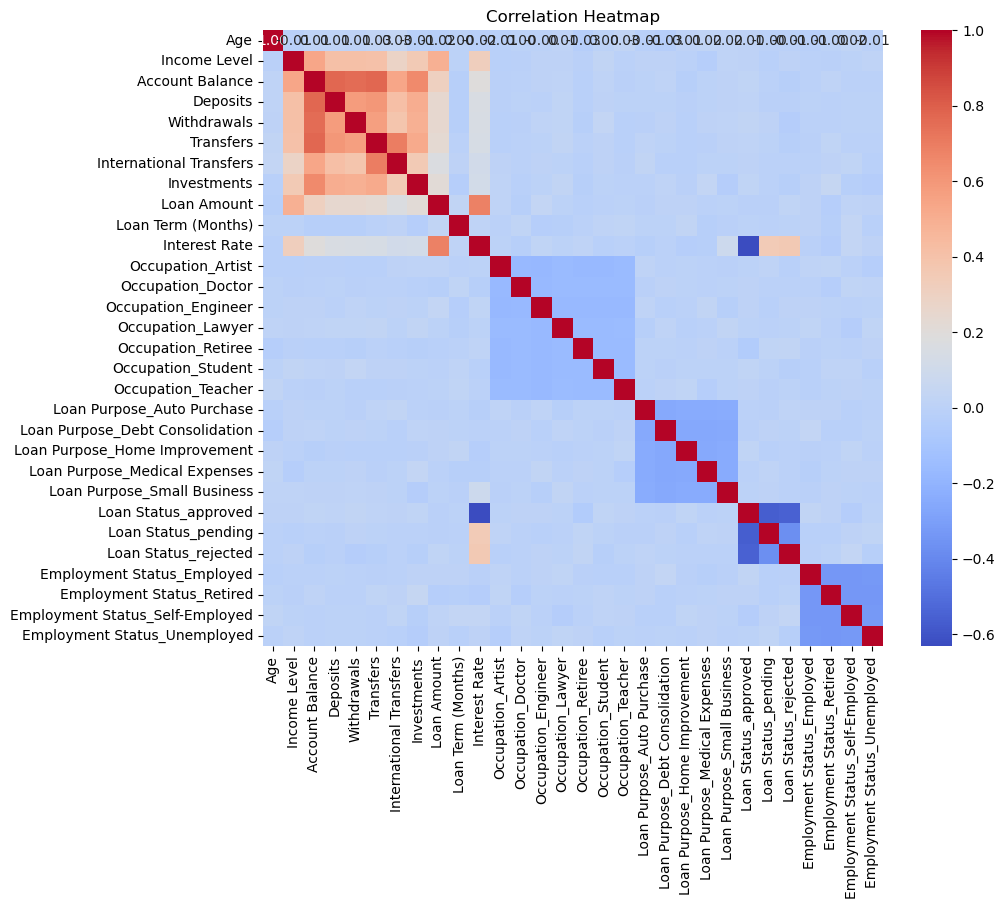

In [27]:
def clean_numeric_column(column):
    return pd.to_numeric(column.replace('[\$,]', '', regex=True), errors='coerce')

for col in X.select_dtypes(include=['object']).columns:
    X[col] = clean_numeric_column(X[col])

corr = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X[:] = scalar.fit_transform(X)

In [30]:
print(df.isna().sum())

Age                                0
Risk Tolerance                     0
Income Level                       0
Account Balance                    0
Deposits                           0
Withdrawals                        0
Transfers                          0
International Transfers            0
Investments                        0
Loan Amount                        0
Loan Term (Months)                 0
Interest Rate                      0
Occupation_Artist                  0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Retiree                 0
Occupation_Student                 0
Occupation_Teacher                 0
Loan Purpose_Auto Purchase         0
Loan Purpose_Debt Consolidation    0
Loan Purpose_Home Improvement      0
Loan Purpose_Medical Expenses      0
Loan Purpose_Small Business        0
Loan Status_approved               0
Loan Status_pending                0
Loan Status_rejected               0
E

In [31]:
X.head()

,Age,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Term (Months),...,Loan Purpose_Home Improvement,Loan Purpose_Medical Expenses,Loan Purpose_Small Business,Loan Status_approved,Loan Status_pending,Loan Status_rejected,Employment Status_Employed,Employment Status_Retired,Employment Status_Self-Employed,Employment Status_Unemployed
0,0.328358,0.363322,0.440942,0.181464,0.309795,0.144184,0.011118,0.217331,0.489132,0.50,...,0,1,0,0,1,0,0,1,0,0
1,0.179104,0.414248,0.284601,0.116865,0.287886,0.267759,0.110074,0.112545,0.583710,0.50,...,0,0,0,1,0,0,0,1,0,0
2,0.283582,0.481044,0.860016,0.450602,0.548252,0.239799,0.204968,0.205364,0.805791,0.00,...,0,0,0,0,1,0,1,0,0,0
3,0.134328,0.035857,0.000000,0.003939,0.007967,0.002319,0.000470,0.003619,0.000000,1.00,...,0,0,1,1,0,0,0,1,0,0
4,0.268657,0.641345,0.776959,0.275617,0.756316,0.486665,0.289058,0.242272,1.000000,0.25,...,0,1,0,1,0,0,1,0,0,0


## Spliting the Dataset into Train and Test

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50,stratify=y)

In [34]:
X_train.shape,X_test.shape

((4653, 30), (1995, 30))

In [35]:
y_train.value_counts()

Risk Tolerance
1    2327
0    2326
Name: count, dtype: int64

In [36]:
y_test.value_counts()

Risk Tolerance
0    998
1    997
Name: count, dtype: int64

In [37]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [38]:
#Prediction
pred=model.predict(X_test_scaled)

In [39]:
pred[:5]

array([0, 0, 1, 0, 1])

In [40]:
binary_pred = (pred > 0.5).astype('int')
binary_pred = binary_pred.flatten()
print(binary_pred[:5])

[0 0 1 0 1]


In [41]:
y_test[:5]

1588    1
5915    1
4856    1
6481    1
3819    1
Name: Risk Tolerance, dtype: int64

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,binary_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       998
           1       0.73      0.70      0.71       997

    accuracy                           0.72      1995
   macro avg       0.72      0.72      0.72      1995
weighted avg       0.72      0.72      0.72      1995



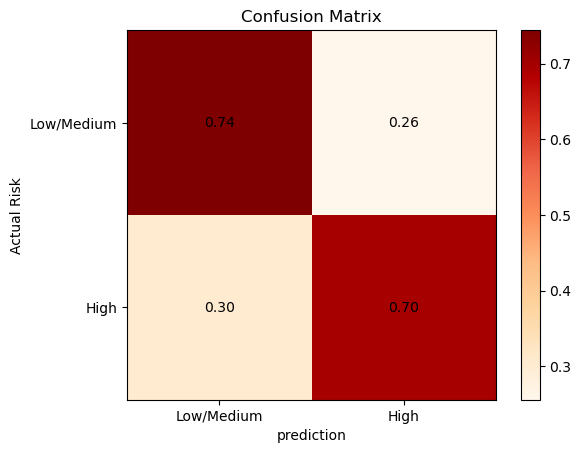

In [43]:
cf = confusion_matrix(y_test, binary_pred, normalize='true')

plt.imshow(cf, cmap='OrRd')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Low/Medium', 'High'])
plt.yticks([0, 1], ['Low/Medium', 'High'])
plt.xlabel('prediction')
plt.ylabel('Actual Risk')

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{cf[i, j]:.2f}", 
                 ha="center", va="center", color="black")

plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

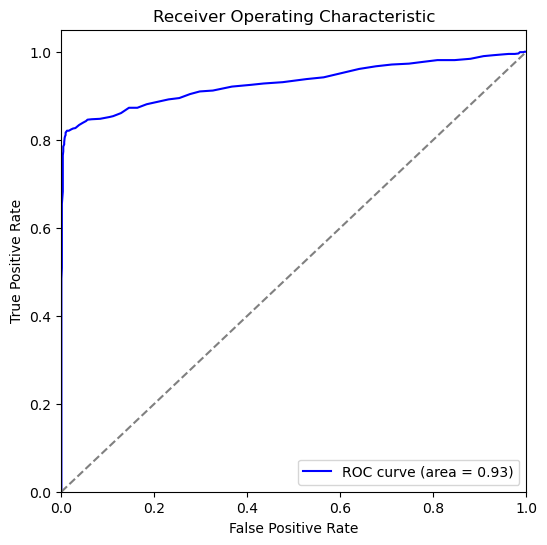

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probability of class '1'

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [84]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[942  56]
 [154 843]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       998
           1       0.94      0.85      0.89       997

    accuracy                           0.89      1995
   macro avg       0.90      0.89      0.89      1995
weighted avg       0.90      0.89      0.89      1995



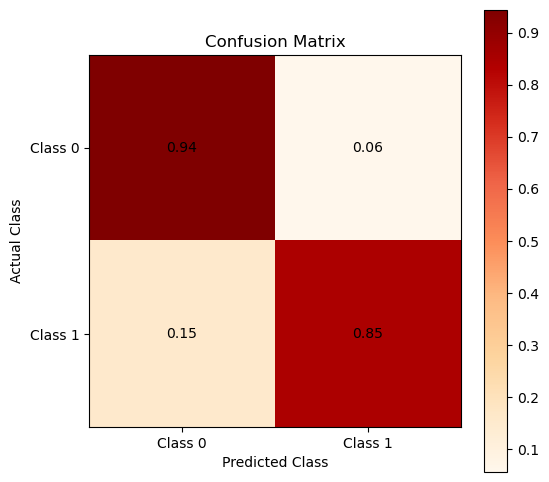

In [86]:
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(6, 6))
plt.imshow(cf, cmap='OrRd')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])  
plt.yticks([0, 1], ['Class 0', 'Class 1'])  
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{cf[i, j]:.2f}", 
                 ha="center", va="center", color="black")

plt.show()